<a href="https://colab.research.google.com/github/emilwestling/AlgorithmTrading/blob/main/AlgoTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful functions

In [ ]:
import numpy as np
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Dataframe with all tickers

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/emilwestling/AlgorithmTrading/main/sp500tickers.txt"
data = pd.read_csv(url, header=None)
data.columns = ['tickers']
data.head()

,tickers
0,AAPL
1,MSFT
2,AMZN
3,NVDA
4,GOOGL


# Autoregressive Model

AR analysis on APPL stock prices without any exogenous variables

In [ ]:
import yfinance as yf

aapl = yf.Ticker("AAPL")
hist = aapl.history(period="24mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-18 00:00:00-04:00,141.809380,145.160609,141.522703,144.873932,85589200,0.0,0.0
2021-10-19 00:00:00-04:00,145.328669,147.463969,144.873939,147.058655,76378900,0.0,0.0
2021-10-20 00:00:00-04:00,146.999325,148.037319,146.425956,147.552917,58418800,0.0,0.0
2021-10-21 00:00:00-04:00,147.108081,147.928590,146.178829,147.770416,61421000,0.0,0.0
2021-10-22 00:00:00-04:00,147.978004,148.462390,146.940010,146.989441,58883400,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-10 00:00:00-04:00,178.100006,179.720001,177.949997,178.389999,43698000,0.0,0.0
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0


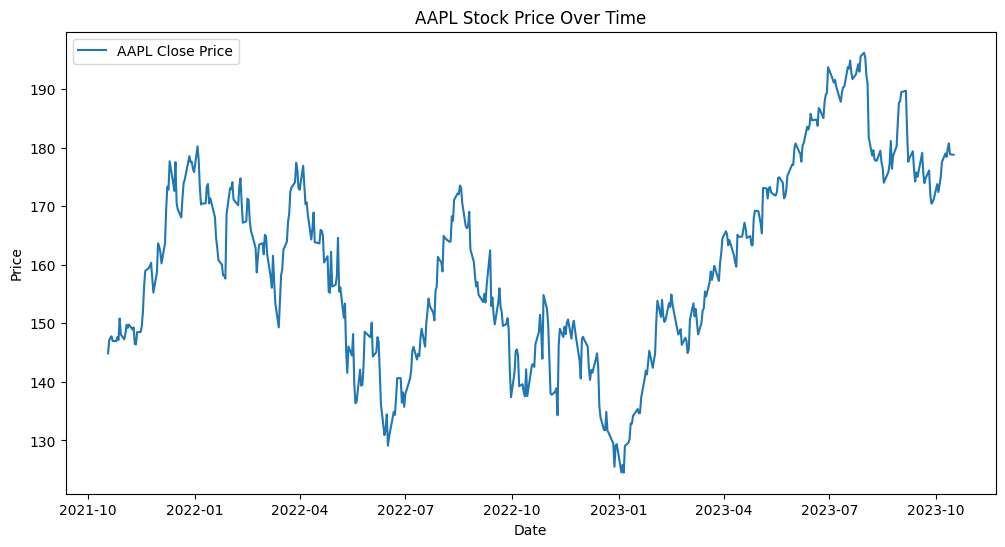

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hist['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

A(10) fitted and plotted.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
first_value = 50
summary_table = pd.DataFrame(columns=['Data', 'Pred'])
predictions = []
for i in range(first_value, hist['Close'].shape[0]):
  model = AutoReg(hist['Close'].values[:i], lags=10)
  fitted = model.fit()
  pred = fitted.forecast()
  predictions.append(pred)

summary_table['Data'] = hist['Close'].values[first_value:]
summary_table['Pred'] = predictions

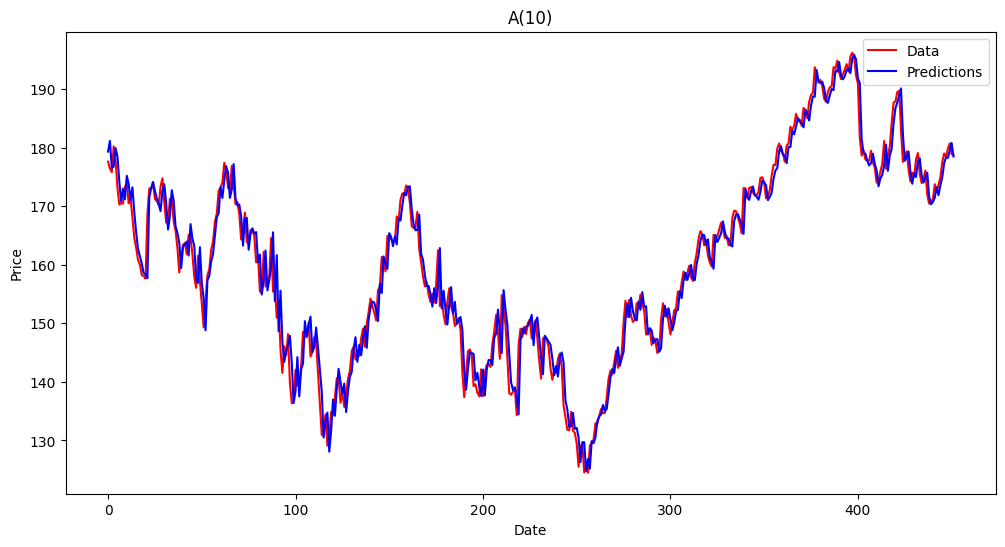

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(summary_table['Data'], color = 'r', label='Data')
plt.plot(summary_table['Pred'], color = 'b', label='Predictions')
plt.title('A(10)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# plt.xlim(100, 200)
# plt.ylim(120, 190)
plt.show()

In [ ]:
rmse(summary_table['Pred'], summary_table['Data'])

array([3.03737344])

# AR with Exogenous Variables

AR analysis with the S&P 500 index as the underlying exogenous variable.

In [ ]:
sp500 = yf.Ticker("^GSPC").history(period="24mo")

In [ ]:
first_value = 50
summary_table = pd.DataFrame(columns=['Data', 'Pred'])
predictions = []
for i in range(first_value, hist['Close'].shape[0]):
  model = AutoReg(hist['Close'].values[:i], lags=10, exog=sp500['Close'].values[:i])
  fitted = model.fit()
  pred = fitted.forecast(exog=sp500['Close'].values[:i])
  predictions.append(pred)

summary_table['Data'] = hist['Close'].values[first_value:]
summary_table['Pred'] = predictions

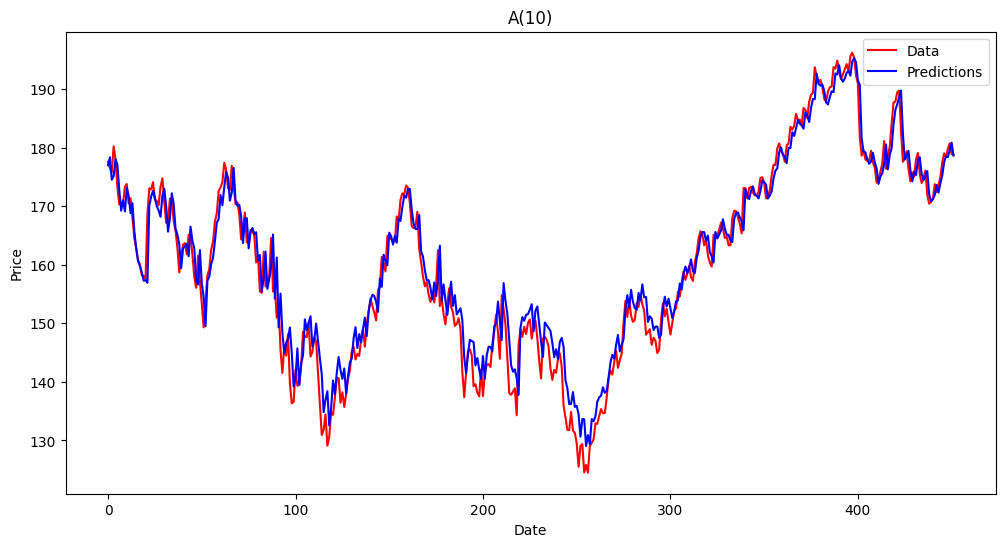

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(summary_table['Data'], color = 'r', label='Data')
plt.plot(summary_table['Pred'], color = 'b', label='Predictions')
plt.title('A(10)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# plt.xlim(100, 200)
# plt.ylim(120, 190)
plt.show()

In [ ]:
rmse(summary_table['Pred'], summary_table['Data'])

array([3.41475725])